
# Análisis de Regresión Lineal - Supermarket Sales

Descripción de las Variables
- **Variable Dependiente (Y):** `Total` - Representa el monto total de la compra en el supermercado.
- **Variable Independiente (X):** `Quantity` - Indica la cantidad de productos comprados.

El objetivo es analizar la relación entre la cantidad de productos comprados y el monto total de la compra



## Juan Diego Letona Aguilar 20230285



In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [110]:

# Cargar el dataset
df = pd.read_csv("supermarketSales.csv")

# Mostrar las primeras filas del dataset
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [111]:

# Preprocesamiento de datos
df = df.dropna()  # Eliminar valores nulos
df = df.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas


In [112]:

# Definir variable independiente y dependiente
X = df[["Quantity"]]  # Variable independiente
y = df["Total"]  # Variable dependiente


In [113]:

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:

# Inicializar el modelo
model = LinearRegression()

# Almacenar historial de pérdida
loss_history = []


In [115]:

# Entrenamiento del modelo con historial de pérdida
for i in range(1, 15):  # Simulamos múltiples iteraciones para registrar el historial
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    loss_history.append(np.float64(mse))


In [116]:

# Predicciones finales
y_pred = model.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


R^2 Score: 0.5066
Mean Squared Error: 32101.0723
Mean Absolute Error: 138.3819


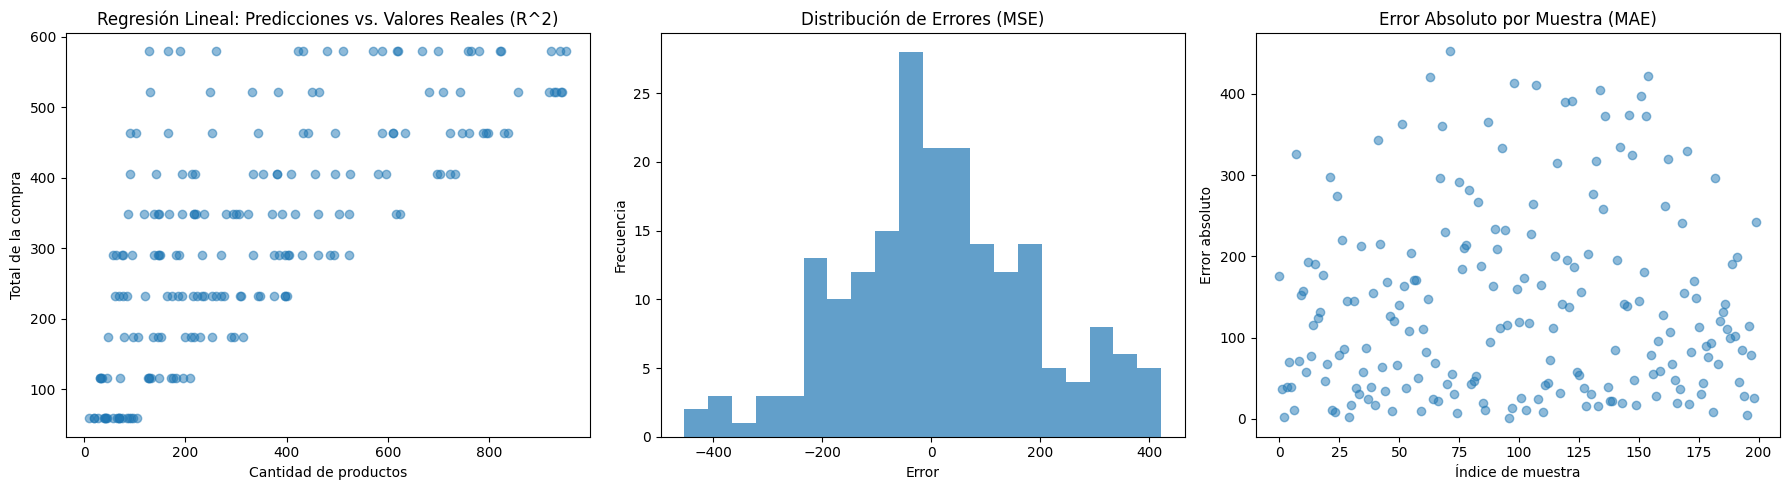

In [117]:

# Visualización de resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfica R^2
axes[0].scatter(y_test, y_pred, alpha=0.5)
axes[0].set_xlabel("Cantidad de productos")
axes[0].set_ylabel("Total de la compra")
axes[0].set_title("Regresión Lineal: Predicciones vs. Valores Reales (R^2)")

# Gráfica MSE
mse_residuals = y_test - y_pred
axes[1].hist(mse_residuals, bins=20, alpha=0.7)
axes[1].set_xlabel("Error")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Distribución de Errores (MSE)")

# Gráfica MAE
axes[2].scatter(range(len(y_test)), abs(mse_residuals), alpha=0.5)
axes[2].set_xlabel("Índice de muestra")
axes[2].set_ylabel("Error absoluto")
axes[2].set_title("Error Absoluto por Muestra (MAE)")

plt.tight_layout()
plt.show()


In [118]:

# Imprimir historial de pérdida
print("Loss History:", loss_history)


Loss History: [np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901), np.float64(29929.74182192901)]


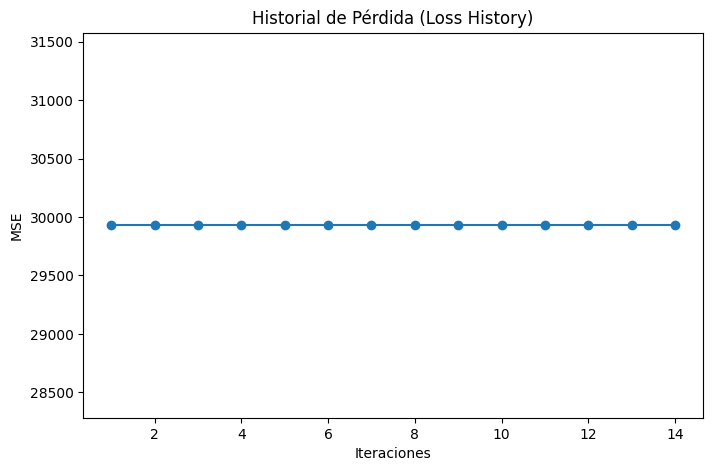

In [119]:

# Gráfica de historial de pérdida
plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), loss_history, marker='o', linestyle='-')
plt.xlabel("Iteraciones")
plt.ylabel("MSE")
plt.title("Historial de Pérdida (Loss History)")
plt.show()


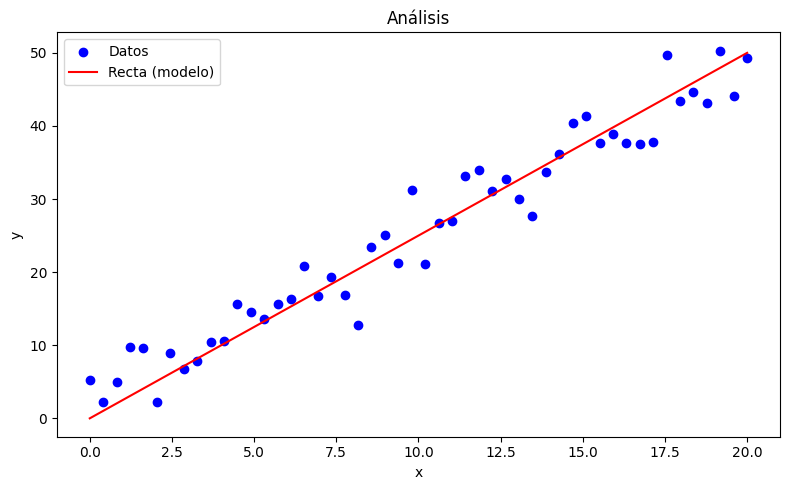

In [120]:
x = np.linspace(0,20,50)
np.random.seed(0)
y = 2.5*x + np.random.normal(0,3,len(x))  # Datos dispersos
y_model = 2.5*x                           # Recta ideal

# Creación de la figura y ejes
fig, ax = plt.subplots(figsize=(8,5))

# Gráfica combinada de scatter + recta
ax.scatter(x, y, label='Datos', color='blue')
ax.plot(x, y_model, label='Recta (modelo)', color='red')

ax.set_title("Análisis")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.tight_layout()
plt.show()

=== Regresión 1: TOTAL vs. UNIT PRICE ===
R^2:  0.4563487815095947
MSE:  35369.40807016888
MAE:  145.54528531680265


c:\Users\Juan Diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


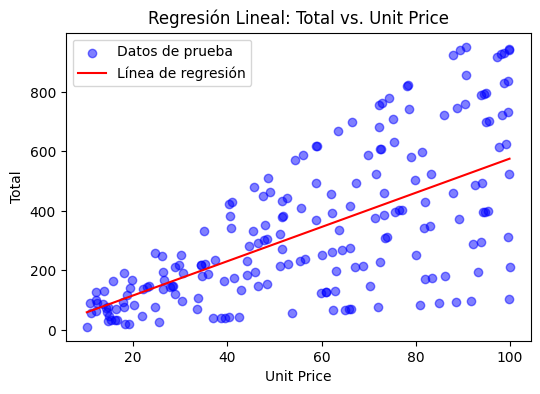

In [127]:
X = df[['Unit price']]  # Debe ser DataFrame (m x 1)
y = df['Total']         # Serie (m, )

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

# 4. Entrenar el modelo
model1 = LinearRegression()
model1.fit(X_train, y_train)

# 5. Predicciones
y_pred = model1.predict(X_test)

# 6. Calcular métricas
r2_1 = r2_score(y_test, y_pred)
mse_1 = mean_squared_error(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)

print("=== Regresión 1: TOTAL vs. UNIT PRICE ===")
print("R^2: ", r2_1)
print("MSE: ", mse_1)
print("MAE: ", mae_1)

# 7. Graficar resultados (test set)
plt.figure(figsize=(6,4))

# Graficar puntos de prueba
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Datos de prueba')

# Para trazar línea de regresión de forma ordenada (en el eje X):
X_test_sorted = np.sort(X_test, axis=0)               # Ordenamos X
y_pred_sorted = model1.predict(X_test_sorted)         # Predicción según X ordenada

plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Línea de regresión')
plt.title('Regresión Lineal: Total vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Total')
plt.legend()
plt.show()


=== Regresión 2: GROSS INCOME vs. QUANTITY ===
R^2:  0.5065852654178084
MSE:  72.79154726783936
MAE:  6.589614487425568


c:\Users\Juan Diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


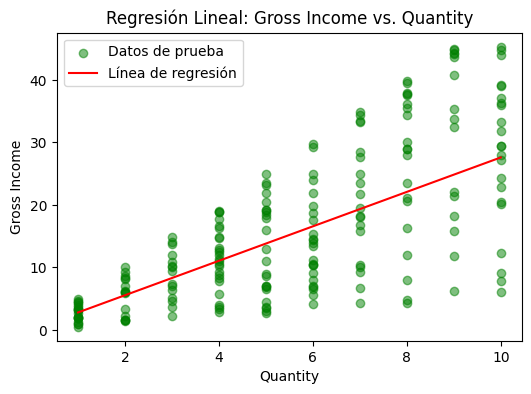

In [125]:
# 1. Definir las variables X e y
X = df[['Quantity']]        # DataFrame
y = df['gross income']      # Serie

# 2. División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

# 3. Entrenar el modelo
model2 = LinearRegression()
model2.fit(X_train, y_train)

# 4. Predicciones
y_pred = model2.predict(X_test)

# 5. Métricas
r2_2 = r2_score(y_test, y_pred)
mse_2 = mean_squared_error(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)

print("\n=== Regresión 2: GROSS INCOME vs. QUANTITY ===")
print("R^2: ", r2_2)
print("MSE: ", mse_2)
print("MAE: ", mae_2)

# 6. Gráfica de dispersión con la recta de regresión
plt.figure(figsize=(6,4))

plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Datos de prueba')

X_test_sorted = np.sort(X_test, axis=0)
y_pred_sorted = model2.predict(X_test_sorted)

plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Línea de regresión')
plt.title('Regresión Lineal: Gross Income vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Gross Income')
plt.legend()
plt.show()


=== Regresión 3: TAX 5% vs. QUANTITY ===
R^2:  0.5065852654178084
MSE:  72.79154726783936
MAE:  6.589614487425568


c:\Users\Juan Diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


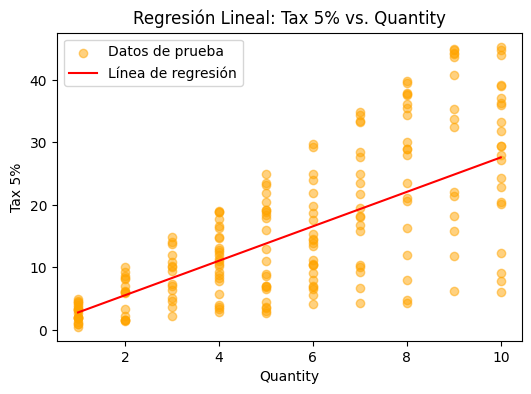

In [126]:
# 1. Definir X e y
X = df[['Quantity']]
y = df['Tax 5%']

# 2. Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 3. Entrenar el modelo
model3 = LinearRegression()
model3.fit(X_train, y_train)

# 4. Predicciones
y_pred = model3.predict(X_test)

# 5. Métricas (R², MSE, MAE)
r2_3 = r2_score(y_test, y_pred)
mse_3 = mean_squared_error(y_test, y_pred)
mae_3 = mean_absolute_error(y_test, y_pred)

print("\n=== Regresión 3: TAX 5% vs. QUANTITY ===")
print("R^2: ", r2_3)
print("MSE: ", mse_3)
print("MAE: ", mae_3)

# 6. Graficar
plt.figure(figsize=(6,4))

plt.scatter(X_test, y_test, color='orange', alpha=0.5, label='Datos de prueba')

X_test_sorted = np.sort(X_test, axis=0)
y_pred_sorted = model3.predict(X_test_sorted)

plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Línea de regresión')
plt.title('Regresión Lineal: Tax 5% vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Tax 5%')
plt.legend()
plt.show()
